In [163]:
from sympy import symbols, exp, Function, Max, Piecewise, Matrix
from sympy.plotting import plot, plot3d, PlotGrid
from sympy.functions.elementary.hyperbolic import tanh
from sympy.printing.latex import LatexPrinter, print_latex

In [130]:
try:
    x, y
except Exception as err:
    print(err)
    x, y = 0, 0

In [131]:
x, y

(x, y)

### Symbols and Functions

In [132]:
x, y = symbols('x, y')

In [133]:
x

x

In [134]:
y

y

In [135]:
f = Function("f")
expr = f(x, y).diff(x, y)

In [136]:
expr

Derivative(f(x, y), x, y)

In [137]:
print_latex(expr)

\frac{\partial^{2}}{\partial y\partial x} f{\left(x,y \right)}


- latex \
$\frac{\partial^{2}}{\partial y\partial x} f{\left(x,y \right)}$

### Plots
- single plots
- multiple plots

In [138]:
g = Function('g')
g = exp
g

exp

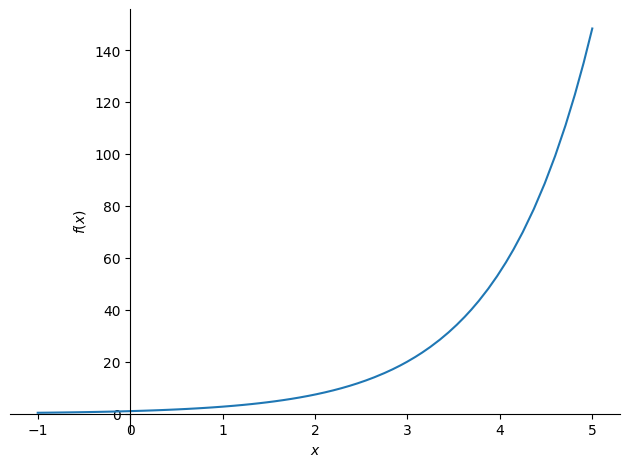

In [139]:
# single plot
plot(g(x), (x, -1, 5))

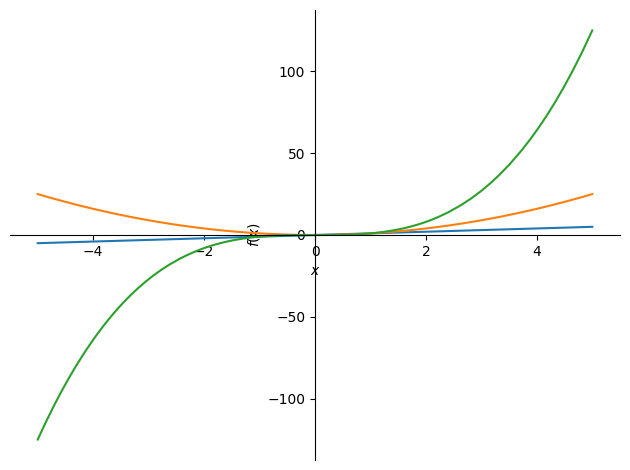

In [140]:
# multiple plot 1
plot(x, x**2, x**3, (x, -5, 5))

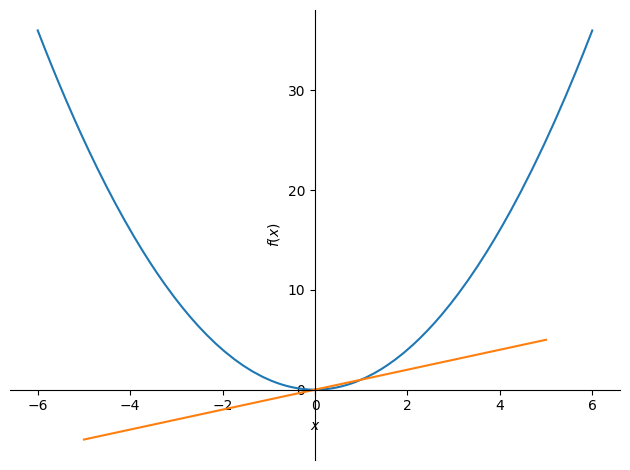

In [141]:
# multiple plot 2
plot((x**2, (x, -6, 6)), (x, (x, -5, 5)))

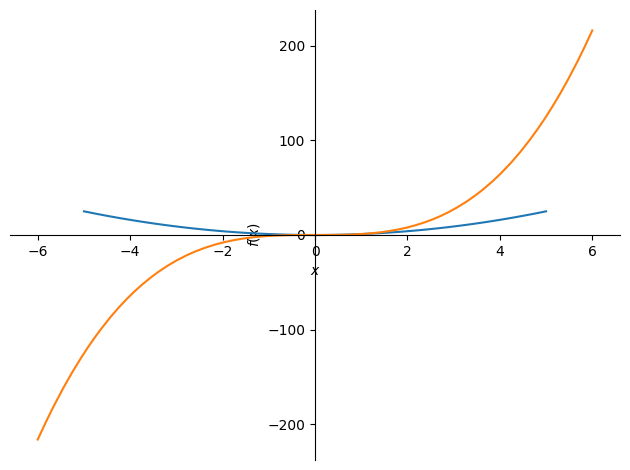

In [142]:
# multiple plot 3
fig1 = plot(x**2, (x, -5, 5), show=False)
fig2 = plot(x**3, (x,-6,6), show=False)
fig1.extend(fig2)
fig1.show()

In [143]:
# Grid plot
x, y = symbols('x, y')
p1 = plot(x, x**2, x**3, (x, -5, 5), show=False)
p2 = plot((x**2, (x, -6, 6)), (x, (x, -5, 5)), show=False)
p3 = plot(x**3, (x, -5,5), show=False)
p4 = plot3d(x*y, (x, -5, 5), (y, -5, 5), show=False)

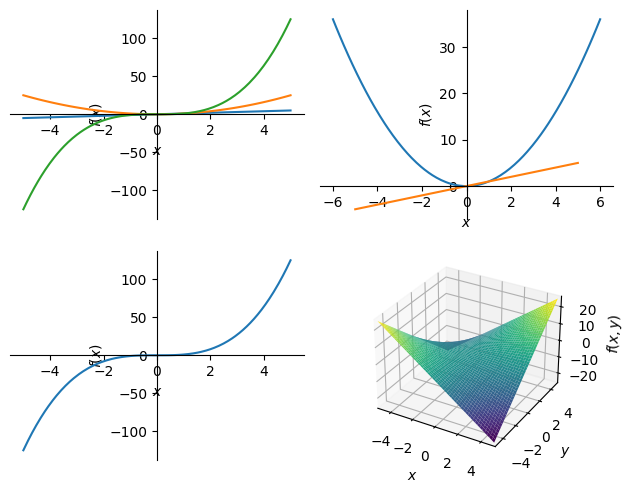

In [144]:
PlotGrid(2,2, p1, p2, p3, p4)

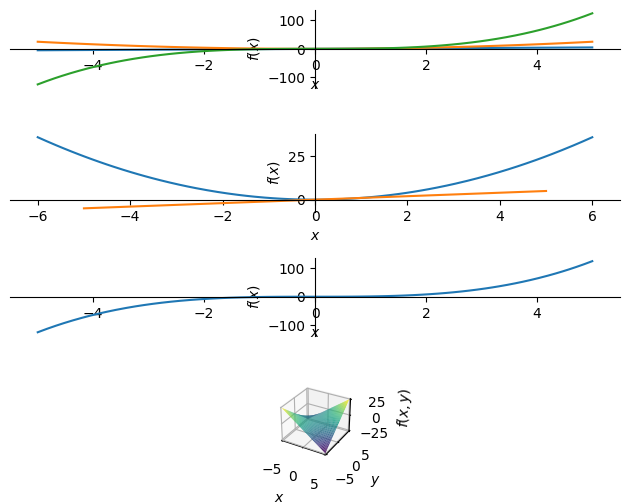

In [145]:
PlotGrid(4,1, p1, p2, p3, p4)

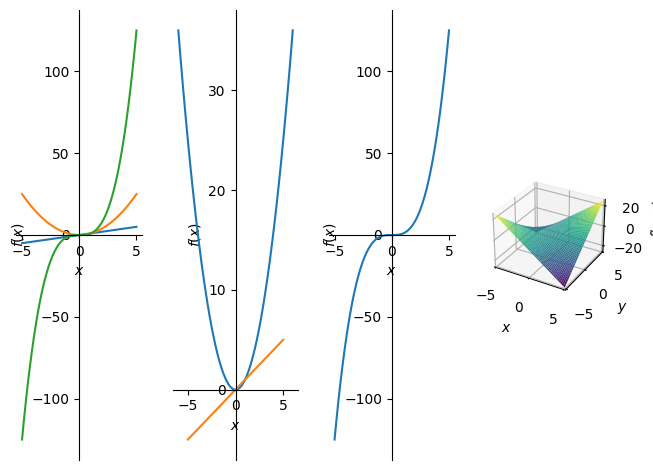

In [146]:
PlotGrid(1,4, p1, p2, p3, p4)

### Activation Functions
- Sigmoid
- ReLU
- tanh

In [147]:
x = symbols('x')

In [148]:
sigmoid = 1 / (1+exp(-x))
sigmoid

1/(1 + exp(-x))

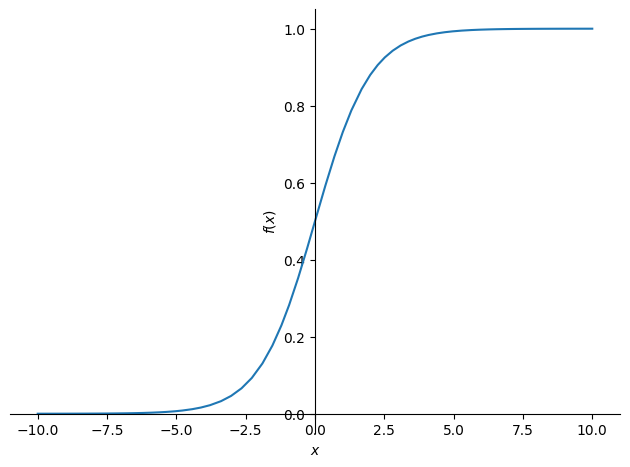

In [150]:
plot(sigmoid, (x, -10, 10))

In [151]:
tanh = (exp(x) - exp(-x)) / (exp(x) + exp(-x)) 
tanh

(exp(x) - exp(-x))/(exp(x) + exp(-x))

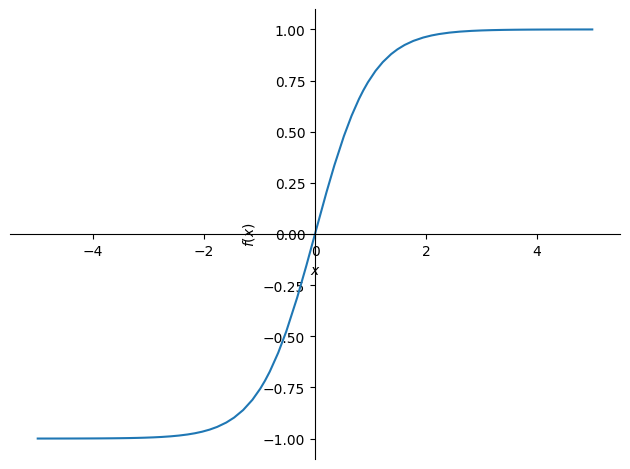

In [152]:
plot(tanh, (x, -5, 5))

In [153]:
relu = Max(0, x)
relu

Max(0, x)

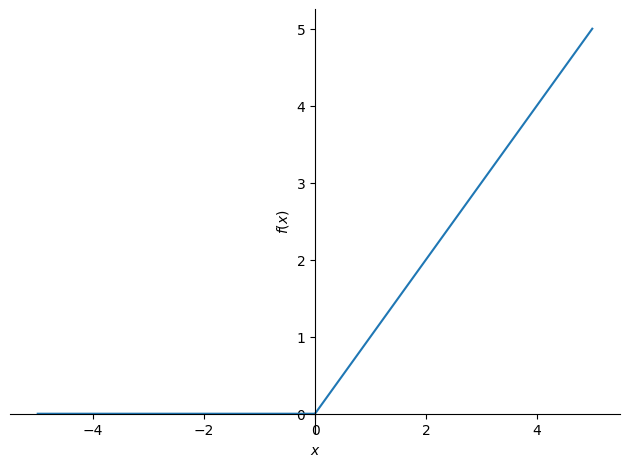

In [154]:
plot(relu, (x, -5, 5))

In [155]:
relu = Piecewise((0, x<0), (x, x>=0))
relu

Piecewise((0, x < 0), (x, True))

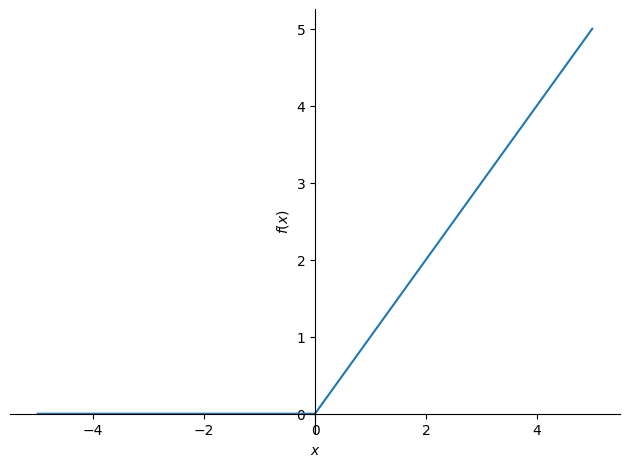

In [156]:
plot(relu, (x, -5, 5))

In [157]:
from sympy import E, log

In [158]:
softplus=log(1 + exp(x), E)
softplus

log(exp(x) + 1)

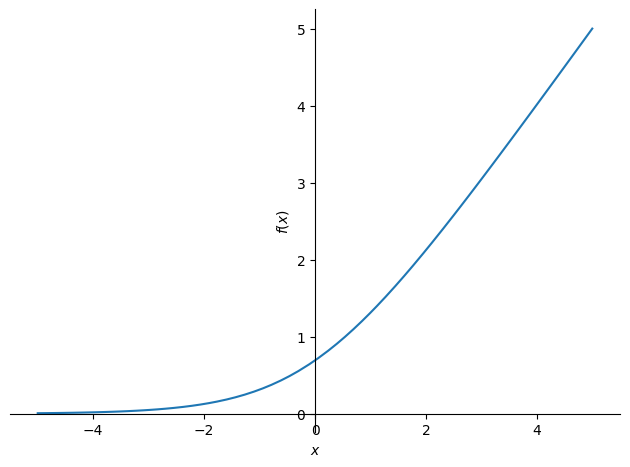

In [159]:
plot(softplus, (x, -5,5))

In [160]:
gaussian = exp(-x**2)
gaussian

exp(-x**2)

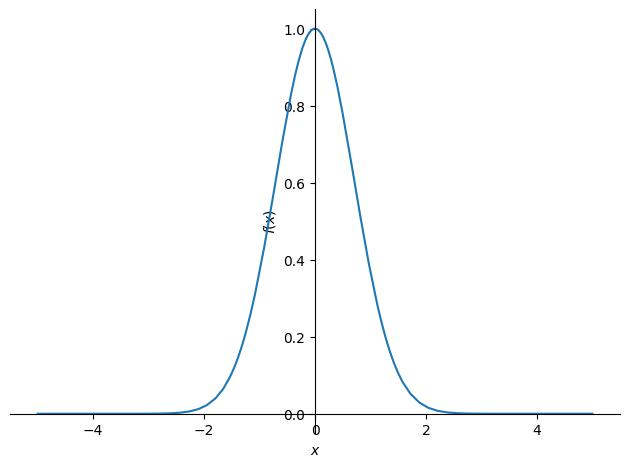

In [161]:
plot(gaussian, (x, -5, 5))

### Matrix

In [164]:
A = Matrix(((25, 15, -5),(15, 18, 0),(-5, 0, 11)))
A

Matrix([
[25, 15, -5],
[15, 18,  0],
[-5,  0, 11]])

In [165]:
x1, x2, x3 = symbols('x1 x2 x3') 

In [166]:
A * Matrix((x1, x2, x3))

Matrix([
[25*x1 + 15*x2 - 5*x3],
[       15*x1 + 18*x2],
[       -5*x1 + 11*x3]])

- Linear Regression: $\mathbf{W}\mathbf{X} = \mathbf{b}$

In [167]:
w1, w2, w3, w4 = symbols('w1, w2, w3, w4')

In [168]:
W = Matrix(((w1, w2),(w3, w4)))
W

Matrix([
[w1, w2],
[w3, w4]])

In [169]:
X = Matrix((x1, x2))
X

Matrix([
[x1],
[x2]])

In [179]:
b1, b2 = symbols('b1 b2')
b = Matrix((b1, b2)) 
b

Matrix([
[b1],
[b2]])

In [182]:
W*X + b

Matrix([
[b1 + w1*x1 + w2*x2],
[b2 + w3*x1 + w4*x2]])

- $sigmoid(\mathbf{W}\mathbf{X}+\mathbf{b})$

In [190]:
l1 = sigmoid.subs({x: b1 + w1*x1 + w2*x2})
l2 = sigmoid.subs({x: b2 + w3*x1 + w4*x2})
l1, l2

(1/(exp(-b1 - w1*x1 - w2*x2) + 1), 1/(exp(-b2 - w3*x1 - w4*x2) + 1))

In [192]:
Y = Matrix((l1, l2))
Y

Matrix([
[1/(exp(-b1 - w1*x1 - w2*x2) + 1)],
[1/(exp(-b2 - w3*x1 - w4*x2) + 1)]])

In [195]:
Y.subs({w1: 0.2, w2: 0.5, w3: 2, w4: -0.4, b1: 3, b2: 2})

Matrix([
[1/(exp(-0.2*x1 - 0.5*x2 - 3) + 1)],
[  1/(exp(-2*x1 + 0.4*x2 - 2) + 1)]])